In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

from citipy import citipy

# Import the API key
from config import weather_api_key

# Import datetime module
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [5]:
url = 'https://api.openweathermap.org/data/2.5/weather?&appid=' + weather_api_key

In [6]:
cities = list(cities)

In [7]:
#Create an empty list to hold the weather data.
city_data = []

print('Begining Data Retrieval  ')
print('----------------------------')

# Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + '&q=' + city
    
    #log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of set {set_count} | {city}')
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
    # Parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']  
    # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H-%M:%S')
# Append the city info into city_data list
        city_data.append({'City': city.title(),
                     'Lat': city_lat,
                     'Lng': city_lng,
                     'Max Temp': city_max_temp,
                     'Humidity': city_humidity,
                     'Cloudiness': city_clouds,
                     'Wind Speed': city_wind,
                     'Country': city_country,
                     'Date': city_date})
# If an error is experienced, skip the city.
    except:
        print('City not found. Skipping...')
        pass
# Indicate the Data loading is Complete.
print('---------------------------------')
print('Data Retrieval Complete          ')
print('---------------------------------')

Begining Data Retrieval  
----------------------------
Processing Record 1 of set 1 | barrow
Processing Record 2 of set 1 | malwan
City not found. Skipping...
Processing Record 3 of set 1 | punta arenas
Processing Record 4 of set 1 | ushuaia
Processing Record 5 of set 1 | guerrero negro
Processing Record 6 of set 1 | hobart
Processing Record 7 of set 1 | albany
Processing Record 8 of set 1 | esperance
Processing Record 9 of set 1 | waddan
Processing Record 10 of set 1 | chuy
Processing Record 11 of set 1 | trujillo
Processing Record 12 of set 1 | jamestown
Processing Record 13 of set 1 | rikitea
Processing Record 14 of set 1 | poum
Processing Record 15 of set 1 | prince rupert
Processing Record 16 of set 1 | carnarvon
Processing Record 17 of set 1 | vaini
Processing Record 18 of set 1 | katsuura
Processing Record 19 of set 1 | honiara
Processing Record 20 of set 1 | turukhansk
Processing Record 21 of set 1 | saint-philippe
Processing Record 22 of set 1 | hofn
Processing Record 23 of se

Processing Record 39 of set 4 | san cristobal
Processing Record 40 of set 4 | touros
Processing Record 41 of set 4 | roald
Processing Record 42 of set 4 | ocos
Processing Record 43 of set 4 | makakilo city
Processing Record 44 of set 4 | qaanaaq
Processing Record 45 of set 4 | breytovo
Processing Record 46 of set 4 | general pico
Processing Record 47 of set 4 | ostrovnoy
Processing Record 48 of set 4 | karla
Processing Record 49 of set 4 | san patricio
Processing Record 50 of set 4 | kavieng
Processing Record 1 of set 5 | chicama
Processing Record 2 of set 5 | yefira
City not found. Skipping...
Processing Record 3 of set 5 | kamenskoye
City not found. Skipping...
Processing Record 4 of set 5 | vryburg
Processing Record 5 of set 5 | sao gabriel da cachoeira
Processing Record 6 of set 5 | mount pleasant
Processing Record 7 of set 5 | portland
Processing Record 8 of set 5 | ahuimanu
Processing Record 9 of set 5 | iskateley
Processing Record 10 of set 5 | saldanha
Processing Record 11 of s

Processing Record 26 of set 8 | aklavik
Processing Record 27 of set 8 | arlit
Processing Record 28 of set 8 | killybegs
Processing Record 29 of set 8 | husavik
Processing Record 30 of set 8 | altus
Processing Record 31 of set 8 | rawson
Processing Record 32 of set 8 | goba
Processing Record 33 of set 8 | mossendjo
Processing Record 34 of set 8 | alugan
Processing Record 35 of set 8 | la ronge
Processing Record 36 of set 8 | charters towers
Processing Record 37 of set 8 | itupeva
Processing Record 38 of set 8 | hanumangarh
Processing Record 39 of set 8 | harper
Processing Record 40 of set 8 | scarborough
Processing Record 41 of set 8 | alyangula
Processing Record 42 of set 8 | krasnoselkup
Processing Record 43 of set 8 | santa margherita ligure
Processing Record 44 of set 8 | berlevag
Processing Record 45 of set 8 | presidencia roque saenz pena
Processing Record 46 of set 8 | gadung
Processing Record 47 of set 8 | sao filipe
Processing Record 48 of set 8 | mwense
Processing Record 49 of

Processing Record 15 of set 12 | ayia galini
Processing Record 16 of set 12 | ust-nera
Processing Record 17 of set 12 | kruisfontein
Processing Record 18 of set 12 | louisbourg
City not found. Skipping...
Processing Record 19 of set 12 | gwadar
Processing Record 20 of set 12 | gurgan
City not found. Skipping...
Processing Record 21 of set 12 | te anau
Processing Record 22 of set 12 | sioux lookout
Processing Record 23 of set 12 | bracebridge
Processing Record 24 of set 12 | aflu
City not found. Skipping...
Processing Record 25 of set 12 | tezu
Processing Record 26 of set 12 | brignoles
Processing Record 27 of set 12 | najran
Processing Record 28 of set 12 | wlodawa
Processing Record 29 of set 12 | samarinda
Processing Record 30 of set 12 | nabire
Processing Record 31 of set 12 | toliary
City not found. Skipping...
Processing Record 32 of set 12 | koryukivka
Processing Record 33 of set 12 | arman
Processing Record 34 of set 12 | haibowan
City not found. Skipping...
Processing Record 35 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.29,-156.79,267.15,85,90,5.70,US,2020-04-16 17-15:31
1,Punta Arenas,-53.15,-70.92,285.15,87,20,5.10,CL,2020-04-16 17-15:40
2,Ushuaia,-54.80,-68.30,284.15,71,99,2.60,AR,2020-04-16 17-15:52
3,Guerrero Negro,27.98,-114.06,296.37,30,55,4.11,MX,2020-04-16 17-18:40
4,Hobart,-42.88,147.33,284.15,66,75,7.20,AU,2020-04-16 17-14:59
5,Albany,42.60,-73.97,279.26,35,75,10.80,US,2020-04-16 17-15:01
6,Esperance,-33.87,121.90,283.15,87,0,2.60,AU,2020-04-16 17-18:41
7,Waddan,29.16,16.14,298.70,30,90,5.44,LY,2020-04-16 17-18:42
8,Chuy,-33.70,-53.46,293.25,79,39,5.63,UY,2020-04-16 17-15:31
9,Trujillo,-8.12,-79.03,297.15,73,1,6.20,PE,2020-04-16 17-15:30


In [12]:
# Reorder columns
new_column_order = ['City','Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2020-04-16 17-15:31,71.29,-156.79,267.15,85,90,5.70
1,Punta Arenas,CL,2020-04-16 17-15:40,-53.15,-70.92,285.15,87,20,5.10
2,Ushuaia,AR,2020-04-16 17-15:52,-54.80,-68.30,284.15,71,99,2.60
3,Guerrero Negro,MX,2020-04-16 17-18:40,27.98,-114.06,296.37,30,55,4.11
4,Hobart,AU,2020-04-16 17-14:59,-42.88,147.33,284.15,66,75,7.20
...,...,...,...,...,...,...,...,...,...
536,Opuwo,NA,2020-04-16 17-24:29,-18.06,13.84,298.79,23,19,0.59
537,Datong,CN,2020-04-16 17-24:29,40.09,113.29,278.98,40,2,6.74
538,Lacombe,CA,2020-04-16 17-23:18,52.47,-113.74,271.15,74,20,2.10
539,Talaya,RU,2020-04-16 17-24:30,61.38,152.75,262.02,88,100,1.88


In [14]:
# Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'
# Export the city_data into a CSV.
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [15]:
# 6.3.1
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

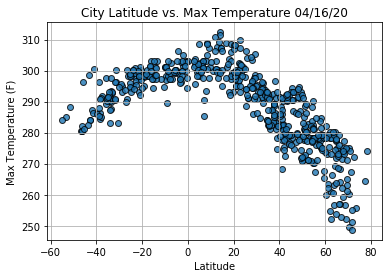

In [20]:
# Build the scatter plot for latitude vs. max temp.
plt.scatter(lats,
           max_temps,
           edgecolor='k', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

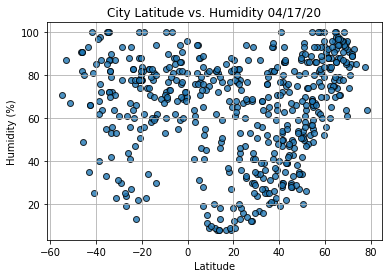

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor='k', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save Figure
plt.savefig('weather_data/Fig2.png')

# Show plot.
plt.show()

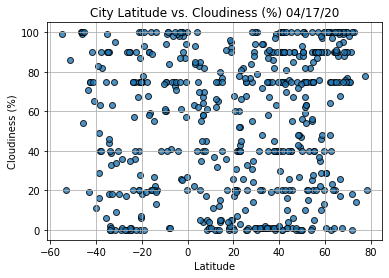

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor='k', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save Figure
plt.savefig('weather_data/Fig3.png')

# Show plot.
plt.show()

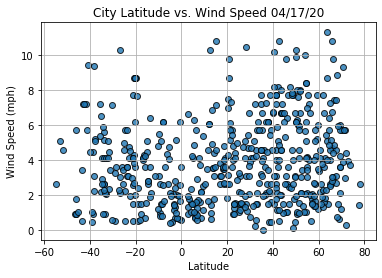

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor='k', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save Figure
plt.savefig('weather_data/Fig4.png')

# Show plot.
plt.show()

In [29]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

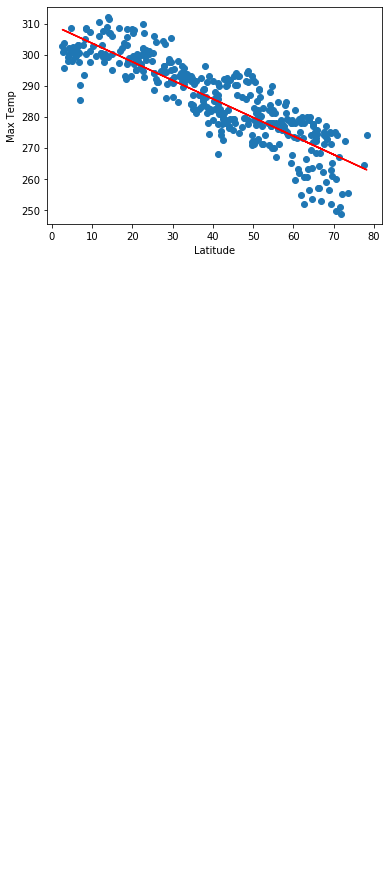

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))

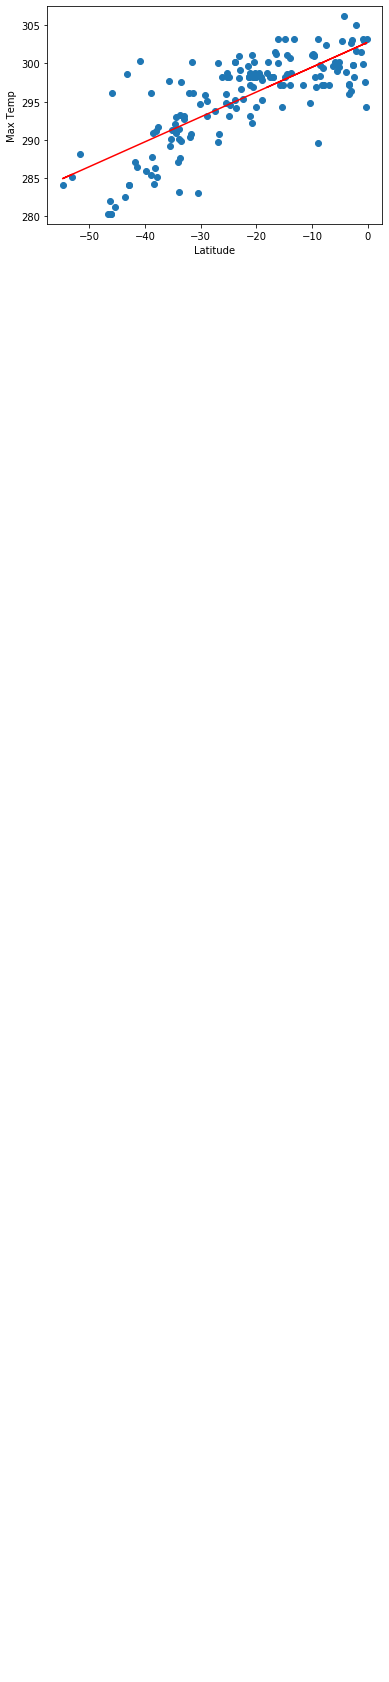

In [40]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,90))

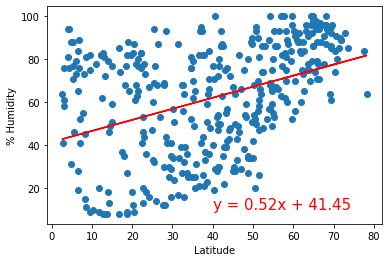

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

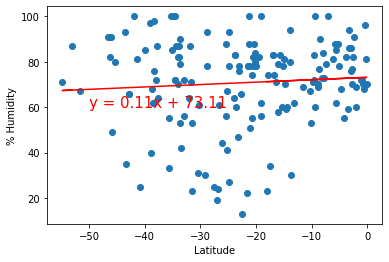

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,60))

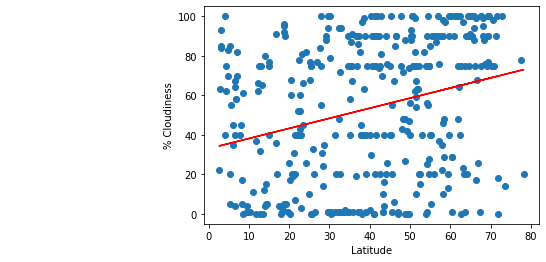

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))